In [3]:
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

## Run DFCSR

In [4]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')

In [ ]:
testCSR.run()

Calculating CSR at s= 0.1


G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:403: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "get_CSR_integrand" failed type inference due to: non-precise type pyobject
During: typing of argument at G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py (407)

File "CSR.py", line 407:
    def get_CSR_integrand(self,s ,x, t, sp, xp):
        <source elided>
        #vx = self.DF_tracker.F_vx([t, x, s - t])
        vx = interpolate3D(xval=np.array([t]), yval=np.array([x]), zval=np.array([s-t]),
        ^

  @numba.jit
G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:403: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "get_CSR_integrand" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "CSR.py", line 451:
    def get_CSR_integrand(self,s ,x, t, sp, xp):
        <source elided

--- 20.08354377746582 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-09-19T11_04_18-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-09-19T11_04_18-07_00-wakes.h5
Finish step 2 in 21.424413204193115 seconds
Calculating CSR at s= 0.2
--- 13.693641901016235 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-09-19T11_04_18-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-09-19T11_04_18-07_00-wakes.h5
Finish step 3 in 15.485809087753296 seconds
Calculating CSR at s= 0.30000000000000004
--- 13.711674213409424 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-09-19T11_04_18-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-09-19T11_04_18-07_00

## Parallel Run with MPI

In [ ]:
# input yaml file in "./input/dipole_config.yaml"
!mpirun -n 4 python  -m pyDFCSR_mpi_run ./input/chicane_config.yaml

## Plot output

In [4]:
from plot_from_output import DFCSR_postprocessor

DFplot = DFCSR_postprocessor(run_name = 'chirp-2023-09-19T10_33_40-07_00',
                             work_dir = './output')

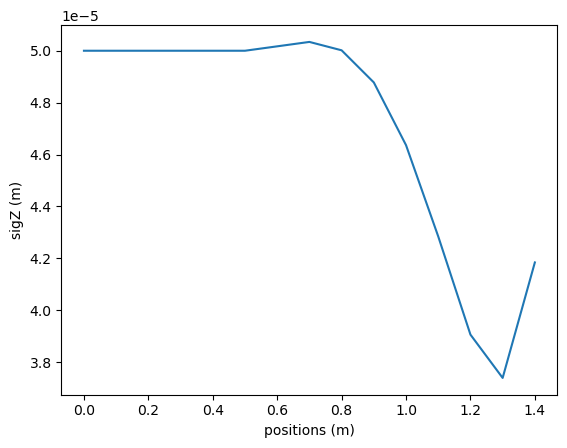

In [5]:
# Plot beam size along the lattice
DFplot.plot_stats(key = 'sigZ')

plot longitudinal wakes at nearest point s  = 1.4000000000000001 m, step count 14
ebeam energy 5000000026.236999


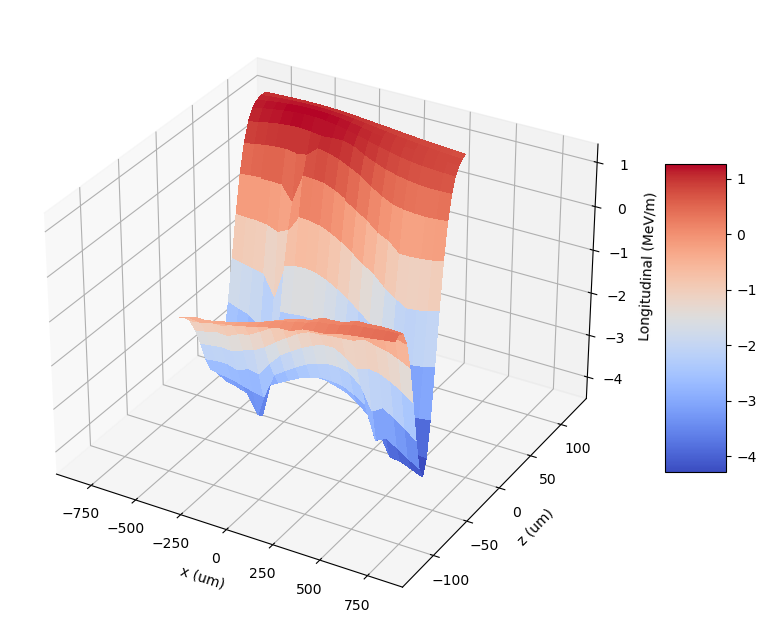

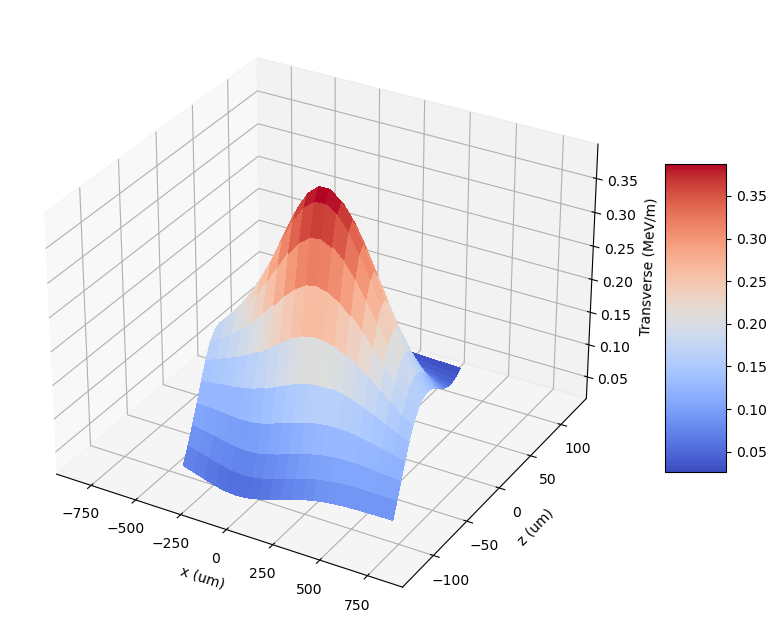

In [6]:
DFplot.plot_wakes(s = 7.25)

plot longitudinal wakes at nearest point s  = 12.79999999999997 m, step count 128


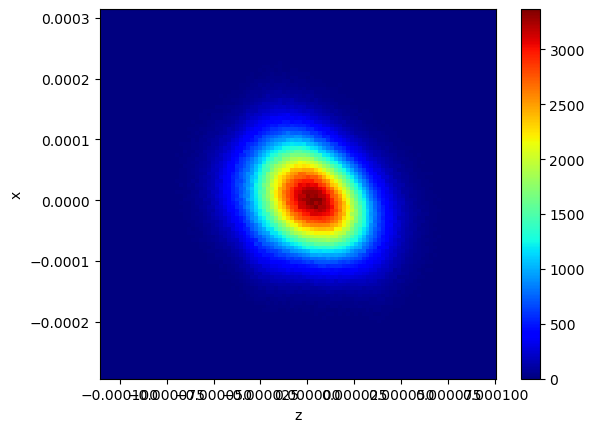

In [12]:
DFplot.plot_particles(s = 12.75, xkey = 'z', ykey = 'x')